## Connected Erdos Renyi Weighted Benchmarker Graph

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random

plt.rcParams["figure.figsize"] = (25,20)

class Graph:
    def __init__(self):
        self.adj_list = []
        self.nodes = []
        self.num_nodes = 0
        self.node_affiliation = {}
        self.cxy = {}
    
    def addNode(self, node, affiliation):
        self.num_nodes += 1
        self.nodes.append(node)
        self.node_affiliation[node] = affiliation
    
    def delNode(self, nodes):
        for i in nodes:
            self.nodes.remove(i)

    def addEdge(self, a, b, w):
        if(a in self.nodes and b in self.nodes):
            t, l = (min(a,b), max(a,b))
            for i in range(len(self.adj_list)):
                if(self.adj_list[i][0] == t and self.adj_list[i][1] == l):
                    self.adj_list[i][2] += w
                    self.cxy[t+l] = self.adj_list[i][2]
                    return
            self.adj_list.append([t, l, w])
            self.cxy[t+l] = w
        else:
            print("This node is not declared")
    
    def get_cost(self):
        cost = 0
        d = self.node_affiliation
        for i in self.adj_list:
            if(d[i[0]] != d[i[1]]):
                cost += i[2]
        return cost

    def IE(self, node):
        #(internal, external) cost of nodes
        internal, external = 0, 0
        d = self.node_affiliation
        p = d[node]
        for i in self.adj_list:
            if(i[0] == node):
                if(d[i[1]] != p):
                    external += i[2]
                else:
                    internal += i[2]
            elif(i[1] == node):
                if(d[i[0]] != p):
                    external += i[2]
                else:
                    internal += i[2]
            else:
                pass
        return (internal, external)

class GraphVisualizer:
    def __init__(self):
        self.G = nx.Graph()
        self.colors = {}
    
    def reset(self):
        self.G = nx.Graph()

    def addEdges(self, graph):
        self.graph = graph
        for i in graph.nodes:
            self.G.add_node(i)
        for i in graph.adj_list:
            self.G.add_edge(i[0], i[1], weight=i[2])
        
    def visualize(self, text="Network Visualized"):
        nodes = self.graph.nodes
        p = list(set(self.graph.node_affiliation.values()))
        
        partitions = []
    
        for k in p:
            partitions.append([i for i in nodes if self.graph.node_affiliation[i] == k])
            if k not in self.colors.keys():
                self.colors[k] = '#%06X' % random.randint(0, 0xFFFFFF)
            
        
        node_colors = [self.colors[self.graph.node_affiliation[n]] for n in list(self.G.nodes)]
        pos = nx.circular_layout(self.G)
        nx.draw_networkx(self.G, pos, node_color = node_colors)
        labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.title(text)
        
        legend_handles = []
        for i in p:
            legend_handles.append(mpatches.Patch(color=self.colors[i], label=i))
        plt.legend(handles=legend_handles)
        plt.show()

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random


def generate_benchmark(n=26, seed=20160):
    #n is number of nodes (n <= 26) as alphabets are used for naming
    #seed is to generate a particular random configuration
    random.seed(seed)
    G = nx.erdos_renyi_graph(n, 0.5, seed=seed)

    for edge in G.edges():
        wt = random.randint(1,7)
        G[edge[0]][edge[1]]['weight'] = wt

    return G

def plot_benchmark(G, showedgewt = False): 
    pos = nx.spring_layout(G) 
    nx.draw_networkx(G, pos=pos, node_size=30, width=0.7)
    if showedgewt:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    plt.show()

def convert_to_our_graph(G):
    hasher = lambda x : chr(list(G.nodes())[x] + 65) 
    graph = Graph()
    
    for i in range(len(G.nodes())):
        graph.addNode(hasher(i), f'p{i+1}')
    
    for edge in G.edges():
        graph.addEdge(hasher(edge[0]), hasher(edge[1]), G[edge[0]][edge[1]]['weight'])
    
    return graph

v = GraphVisualizer()

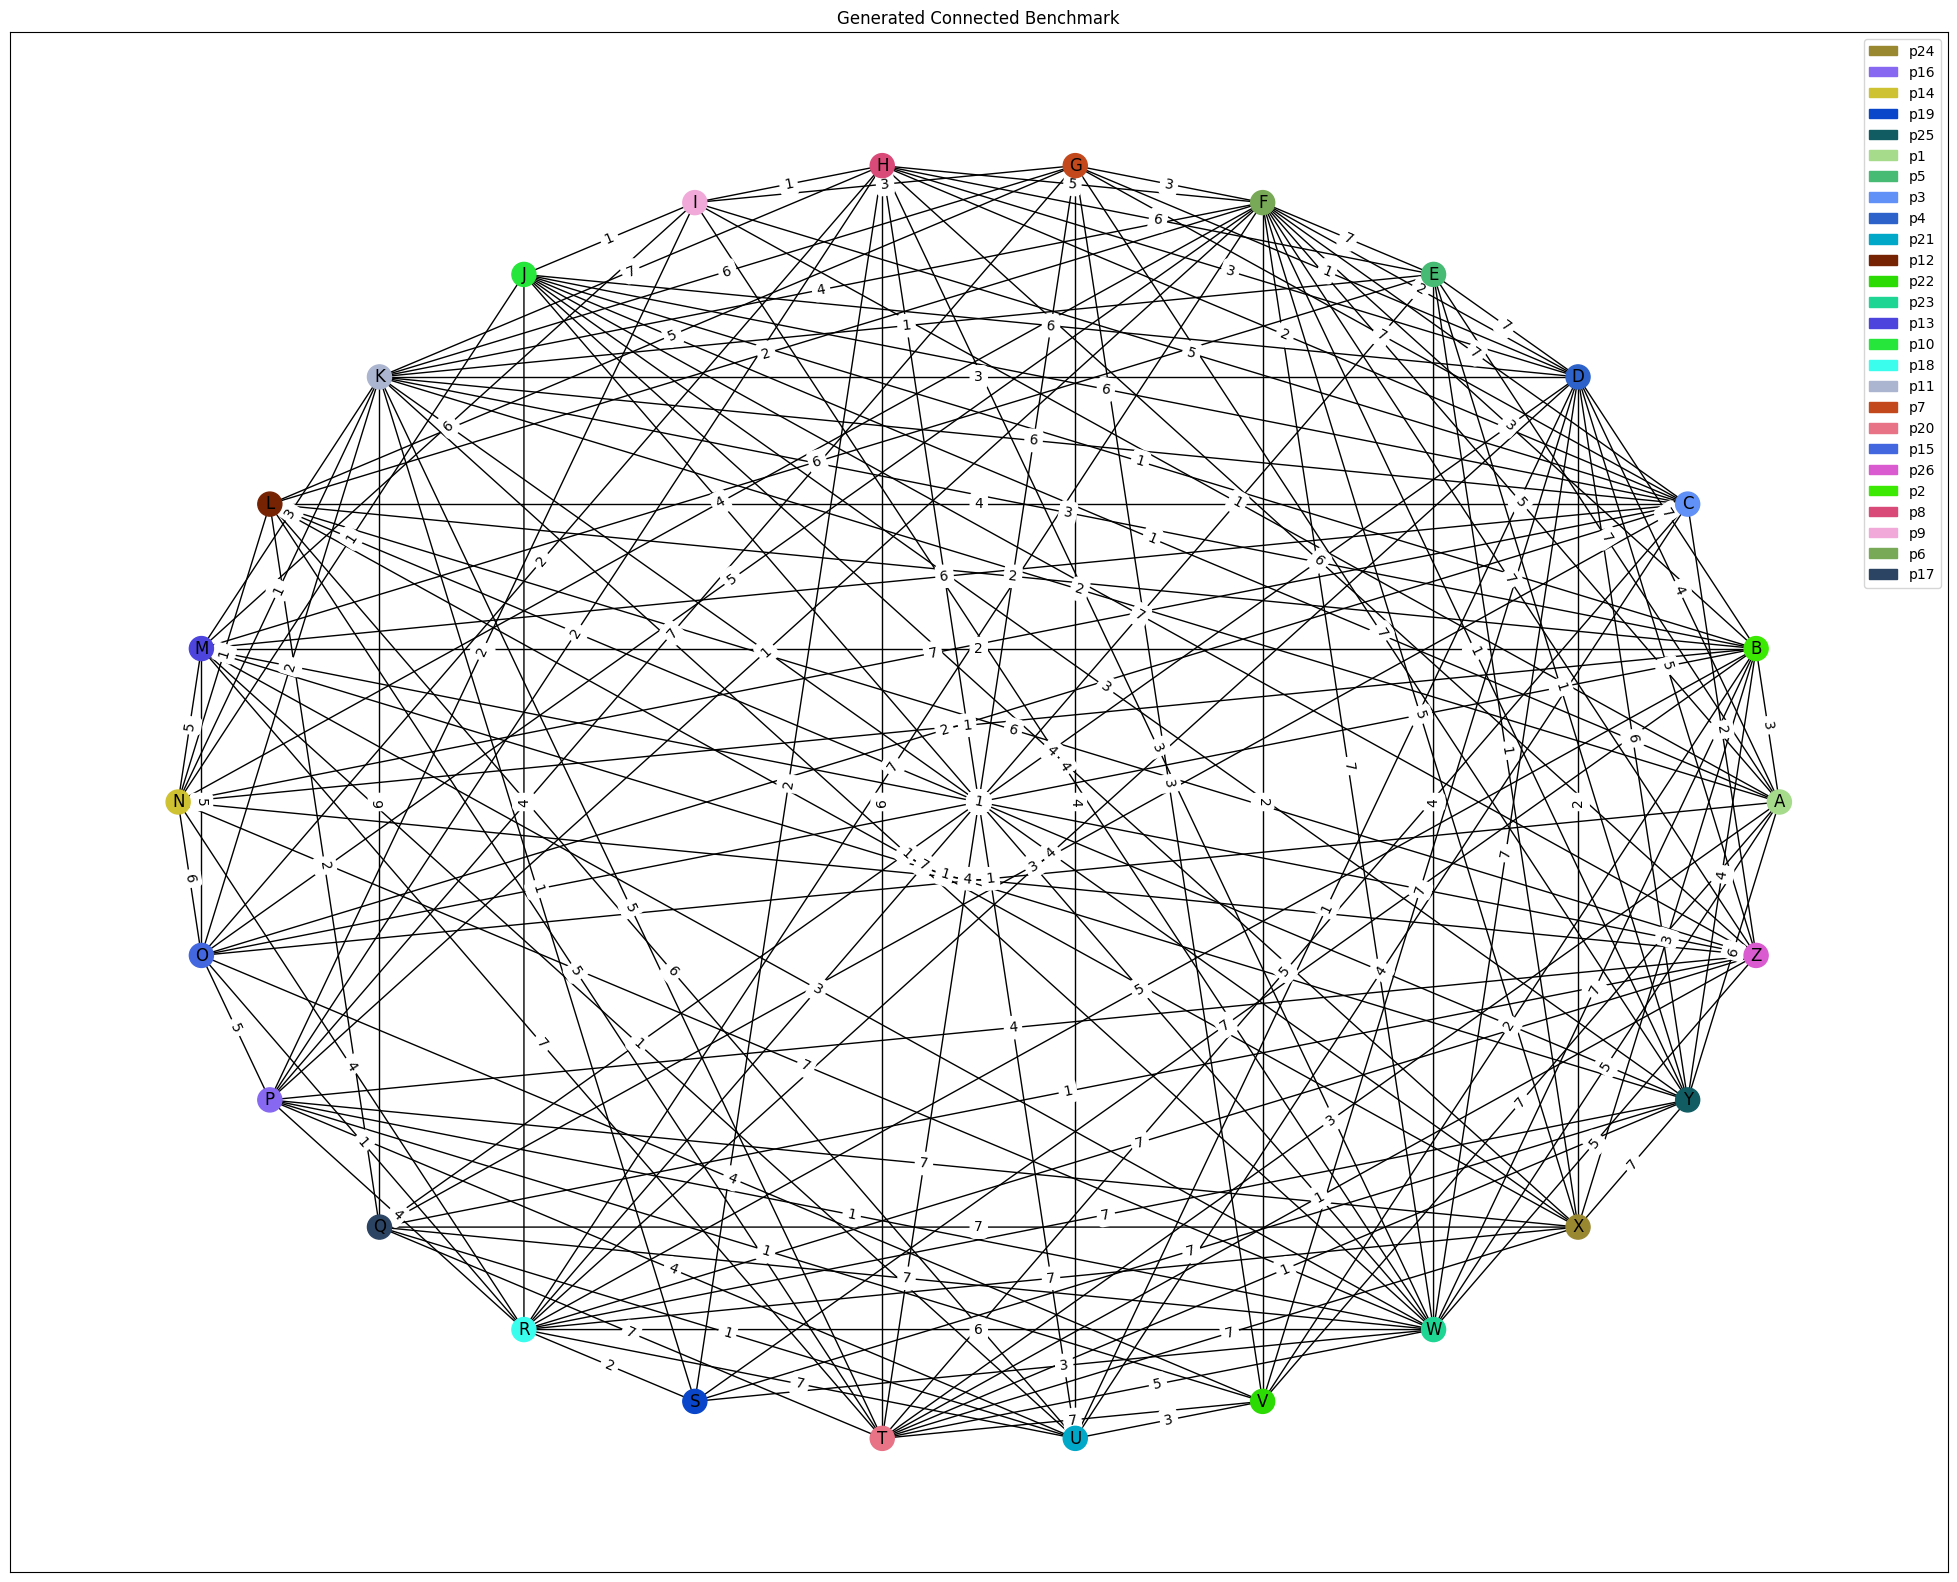

In [3]:
g = generate_benchmark()
graph = convert_to_our_graph(g)

v.addEdges(graph)
v.visualize("Generated Connected Benchmark")